## 실험 설계(Design of experiment)
* experiment: 어떤 가설(hypothesis)을 확인(confirm)/기각(reject)하여 결론을 내기위해 설계   
예시) 어떠한 결정을 내릴 시 유의미한 차이가 발생하는지 등   
신약이 기존의 약보다 효력이 좋은지 / 판매가를 변경하면 수익이 오를지

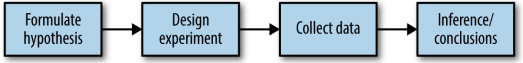
<center>classical statistical inference pipeline</center>  
* inference: 제한된 데이터셋에서 수행한 실험 결과를 더 큰 process나 모집단(population)에 적용하는 것

## A/B Testing
* 방안, 절차 등 두가지 처리 방법(treatment)에 대해 어느 것이 나은지 확인하기 위해, 두 그룹으로 구성한 실험   
* 일반적으로 기존 방식과 새로운 방식에 대해 비교하며, 기존 방식을 따르는 그룹을 대조군(control)으로 둠   
control group: 기존 방식대로 처리한 subject들의 그룹   
treatment group: 새로운/특정한 방식으로 처리한 subject들의 그룹
* treatment만 두 그룹간의 차이 발생의 원인이 되도록 제어하기, 위해 subject들은 랜덤하게 선정
* test statistic: 두개 그룹을 비교하기 위해 사용할 지표(평균 등)   
연구자 편향(bias)을 막기 위해, 실험을 실행하기 전 결정


적용 사례 예시) web context
- treatment: web page, price of a product, wording of a headline, ...
- subject: web visitor
- outcome: clicks, purchases, visit duration, number of pages visited, whether a particular page is visited


* 두가지 이상의 treatment를 비교하는 experimental design: multi-arm bandit

## Hypothesis Tests (Significance test)
* 가설 검정 (유의성 검정)
* 어떤 현상이 우연히 일어난 것인지 / 분명한 차이가 있는 것인지 확인   


* Null hypothesis: 귀무가설. 두 그룹은 본질적으로 같고, 값 차이는 우연히 일어났다고 가정
* Alternative hypothesis: 대립가설. 귀무가설과 반대되는 가정. 일반적으로 실험을 통해 입증하고 싶은 내용으로 설정  
Null = “no difference between the means of group A and group B”;   
alternative =“A is different from B” (could be bigger or smaller) //   
Null = “A ≤ B”; alternative = “A > B”
* 가설 검정을 통해, 귀무가설이 거짓 여부를 입증함으로써 대립가설의 참/거짓을 확인할 수 있음


* One-way(one-tail) test: 추정 값이 기준 값에서 왼쪽/오른쪽 중 한 방향으로만 벗어날 때 사용   
Null = “A = B”; alternative =“A > B” (“A > B”)   
* Two-way(two-tail) test: 추정 값이 기준 값보다 크거나 작은 경우에 사용   
Null = “A = B”; alternative =“A ≠ B”

## Resampling
* 통계량의 random variability를 평가하기 위해, observed data에서 값을 여러번 반복 추출하는 것


* bootstrap: sample에서 계산한 추정치(estimate)의 신뢰성(reliability)을 평가하기 위해 사용
* permutation: 두 개 이상 그룹을 포함하는 가설 검정에 사용

### Permutation Test
1. 서로 다른 그룹(A, B, C, D, ...)의 데이터를 연결하여 single data set 구축
2. 새로 구축한 데이터셋을 섞고(shuffle), 이를 비복원추출하여 기존 A 그룹과 같은 사이즈인 새로운 데이터 그룹 형성
3. 마찬가지로 남은 데이터셋을 비복원 추출하여 기존 그룹 B, C, D, ...와 같은 크기의 새로운 데이터 그룹 형성
4. 기존 그룹들에서 계산했던 statistic/estimate(그룹 간 비율 차이 등)을 새로 형성한 그룹들에 대해서도 계산; 순열 반복 1회
5. 1~4 단계를 R회 반복하여, test statistic의 permutation distribution 생성
6. 최초 관찰했던 그룹간 차이(difference)와 permuted 그룹간 차이를 비교했을 때, 최초 관찰한 차이가 permutation distribution에서 드물게 나타나는 경우 해당 차이는 통계적으로 유의미하다고 판단함(statistically significant). 즉 그룹간에 분명한 차이가 존재함

### Permutation Test - example
문제 상황: 고품질의 서비스를 판매하는 회사에서 두가지 웹페이지(A, B) 중 어떤 웹페이지가 더 홍보를 잘하는 지 알고 싶으나, 서비스의 가격이 높아 충분한 판매 데이터가 없음   

변수 설정: proxy variable 사용. 웹페이지를 오래 보는 사람은 서비스를 구매할 확률이 높다고 판단하여, 웹페이지 잔류 시간(session time)을 변수로 사용하기로 결정   

실험 설계: 웹페이지 A, B의 average session time을 비교하여 통계적으로 유의미한 차이가 있는지 검정
* 대리변수(proxy variable): 획득이나 사용이 어려운 어떤 변수를 대신하여 사용하는 변수

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# page A, page B 
sessiojn_times = pd.read_csv('./web_session_time.csv')
sessiojn_times.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [3]:
print(len(sessiojn_times[sessiojn_times['Page'] == 'Page A']))
print(len(sessiojn_times[sessiojn_times['Page'] == 'Page B']))

21
15


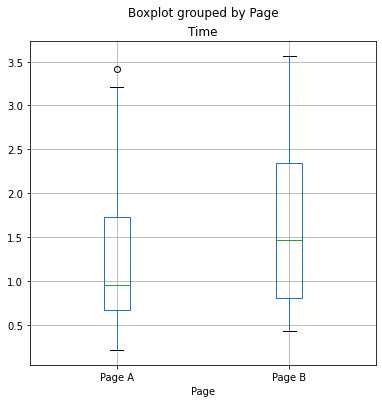

In [4]:
sessiojn_times.boxplot(column='Time', by='Page', figsize=(6,6))
plt.show()

In [5]:
mean_A = sessiojn_times[sessiojn_times['Page'] == 'Page A']['Time'].mean()
mean_B = sessiojn_times[sessiojn_times['Page'] == 'Page B']['Time'].mean()
print(mean_B - mean_A) # web page A, B의 average session time의 차이(difference)

0.35666666666666713


In [6]:
# A, B의 Time을 섞어서 하나의 데이터 셋을 만듦
# nA, nB 크기의 그룹 2개로 나누어야 함 
nA = 21
nB = 15

n = nA + nB 
idx_list = set(list(range(n)))
import random
idx_A = set(random.sample(idx_list, nA))
idx_B = idx_list - idx_A
print(idx_A)
print(idx_B)

{0, 1, 2, 3, 4, 5, 6, 9, 11, 12, 15, 17, 19, 20, 22, 23, 24, 26, 28, 31, 33}
{32, 34, 35, 7, 8, 10, 13, 14, 16, 18, 21, 25, 27, 29, 30}


C:\Users\user\AppData\Local\Temp/ipykernel_33624/3104810968.py:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  idx_A = set(random.sample(idx_list, nA))


In [7]:
regroup_A = sessiojn_times['Time'].loc[idx_A]
regroup_B = sessiojn_times['Time'].loc[idx_B]

In [8]:
regroup_B.mean() - regroup_A.mean()

0.006952380952381043

In [9]:
def permute_test(times, nA, nB):
    n =nA + nB
    idx_list = set(list(range(n)))
    idx_A = set(random.sample(idx_list, nA))
    idx_B = idx_list - idx_A
    
    regroup_A = times.loc[idx_A]
    regroup_B = times.loc[idx_B]
    
    return regroup_B.mean() - regroup_A.mean()

In [10]:
print(permute_test(sessiojn_times['Time'], nA, nB))

-0.41704761904761933


C:\Users\user\AppData\Local\Temp/ipykernel_33624/2392290661.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  idx_A = set(random.sample(idx_list, nA))


In [11]:
random.seed()
# permutation difference
p_diffs = []
for _ in range(1000):
    diff = permute_test(sessiojn_times['Time'], nA, nB)
    p_diffs.append(diff)


C:\Users\user\AppData\Local\Temp/ipykernel_33624/2392290661.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  idx_A = set(random.sample(idx_list, nA))


<AxesSubplot:ylabel='Frequency'>

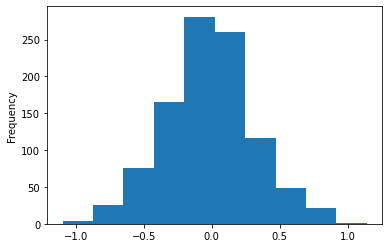

In [12]:
pd.Series(p_diffs).plot.hist()

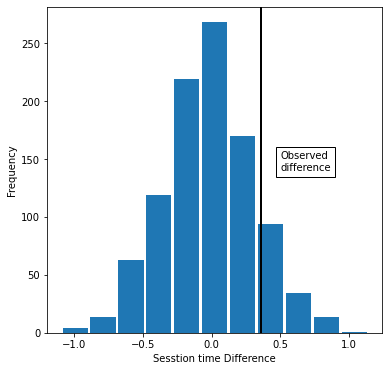

In [13]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.hist(p_diffs, bins = 11, rwidth=0.9)

ax.axvline(x=mean_B - mean_A, color='black', lw=2)
ax.text(0.5, 140, 'Observed\ndifference', bbox={'facecolor': 'white'})

ax.set_xlabel('Sesstion time Difference')
ax.set_ylabel('Frequency')

plt.show()

In [14]:
import numpy as np

In [15]:
p_diffs = np.array(p_diffs)

In [16]:
sum(p_diffs > mean_B - mean_A) / len(p_diffs)
# A = B 귀무가설 1%,5%센트보다 평균에 가까우면 같다는 가설을 기각을 못한다.

0.123

In [17]:
nA = 200 + 23539
nB = 182 + 22406

In [18]:
# Price A, B에 따라서 구매율의 차이가 유의미하게 나는가?
# Null : 가격을 바꿔도 구매율 차이는 나지 않는가? ( A = B)
# Alternative : 가격을 바꾸면 구매율 차이는 난다. (A is not B)

# Numeric : 숫자 자체가 의미를 가짐
# Categorical : numeric (label) 로 변형 해주는 과정

# Purchase(1) / Not Purchase(0)
rate_A = 200 / (200 + 23539)
rate_B = 182 / (182 + 22406)

rate_diff = rate_B - rate_A
print(rate_diff)




-0.0003675791182059275


In [19]:
# Permutation Test
# 1) 하나의 데이터 셋으로 combine
outcomes = [0] * (23539 + 22406) + [1] * (200 + 182)
outcomes = pd.Series(outcomes)
outcomes

0        0
1        0
2        0
3        0
4        0
        ..
46322    1
46323    1
46324    1
46325    1
46326    1
Length: 46327, dtype: int64

In [20]:
# 2) 새로 만든 데이터셋 하나를 -> nA 크기 그룹 하나와 nB 크기 그룹 하나로 재구축
outcomes = [0] * (23539 + 22406) + [1] * (200 + 182)
outcomes = random.sample(outcomes, len(outcomes))
regroup_A, regroup_B = outcomes[:nA], outcomes[nA:]

In [21]:
r_A = sum(regroup_A) / len(regroup_A)
r_B = sum(regroup_B) / len(regroup_B)
r_B - r_A

-0.0003675791182059275

In [22]:
print(len(regroup_A), len(regroup_B))
print(nA,nB)

23739 22588
23739 22588


In [23]:
def perm_test(outcome_list, nA, nB): # permutation test 1회 수행
    n = nA + nB
    idx_list = set(list(range(n)))
    idx_A = set(random.sample(idx_list, nA))
    idx_B = idx_list - idx_A
    regroup_A = outcome_list[idx_A]
    regroup_B = outcome_list[idx_B]
    r_A = sum(regroup_A) / len(regroup_A)
    r_B = sum(regroup_B) / len(regroup_B)
    return r_B - r_A

In [24]:
random.seed(1)
outcomes = [0] * (23539 + 22406) + [1] * (200 + 182)
rate_diffs = []
for _ in range(500):
    diff = perm_test(pd.Series(outcomes), nA, nB)
    rate_diffs.append(diff)

C:\Users\user\AppData\Local\Temp/ipykernel_33624/778723469.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  idx_A = set(random.sample(idx_list, nA))


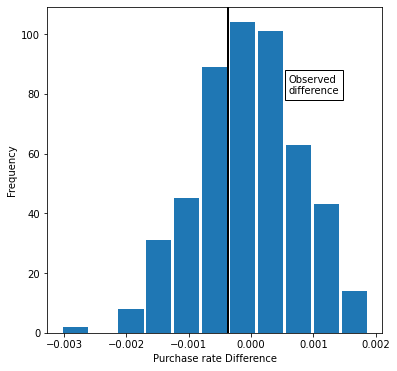

In [26]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.hist(rate_diffs, bins = 11, rwidth=0.9)

ax.axvline(x=rate_diff, color='black', lw=2)
ax.text(0.0006, 80, 'Observed\ndifference', bbox={'facecolor': 'white'})

ax.set_xlabel('Purchase rate Difference')
ax.set_ylabel('Frequency')

plt.show()

In [27]:
rate_diffs = np.array(rate_diffs)
print(sum(rate_diffs > rate_diff) / len(rate_diffs))

0.65


* random permutation test(randomization test): random shuffling & dividing
* exhaustive permutation test(exact test)
* bootstrap permutation test

##### exhaustive permutation test
* 데이터가 나누어질 수 있는 모든 경우의 수 고려 (sample size가 작을 때만 실용적)

##### bootstrap permutation test
* 복원추출로 진행

## Statistical Significance and p-Values
* statistical significance: 우연히 일어날 수 있는 것보다 극단적인 결과를 내는지 측정하는 것   
chance variation 범위를 넘어서는 경우 통계적으로 유의하다고 판단함
* p-value: chance model에서 관찰된 결과보다 극단적인(extreme) 값이 나올 수 있는 빈도(frequency)

|Outcome|Price A|Price B|전체|
|:---|:---|:---|---:|
|Purchase|200|182|382|
|Not Purchase|23,539|22,406|45,945|
|전체|23,739|22,588|46,327|

|Outcome|Price A|Price B|전체|
|:---|:---|:---|---:|
|Purchase|196|186|382|
|Not Purchase|23,543|22,402|45,945|
|전체|23,739|22,588|46,327|

### Alpha(α)
* null hypothesis 기각(reject) 기준이 되는 임계값(threshold)
* 일반적으로 alpha level은 5%(0.05), 1%(0.01) 사용

### Type I error, Type II error
* Type I error: 참인 가설을 기각하는 오류(false negative)
* Type II error: 거짓인 가설을 채택하는 오류(false positive)
* confusion matrix
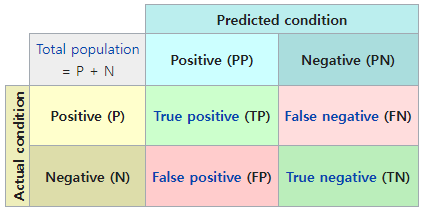

* 데이터의 타입(count data / measured data), sample 개수 등에 따라 적절한 타입의 significance test를 사용함

## 자유도(Degrees of Freedom)
* 표본 데이터에서 계산된 statistic에 적용되는 개념으로, 자유롭게 변경할 수 있는 값의 '개수'를 의미하며, 여러 확률 분포의 모양에 영향을 미침   
예시) 10개의 값이 있는 표본집단의 mean을 알고 있다면, 자유도는 9

## t-Test
* 단일 표본 평균의 분포를 근사하기 위해 개발된 t-분포에서 이름을 따옴
* 데이터 타입이 numeric(not binary)인 A/B test에서 많이 사용됨

## ANOVA
* numeric data를 가진 multiple group 간 통계적으로 유의미한 차이가 있는지 검정하는 절차

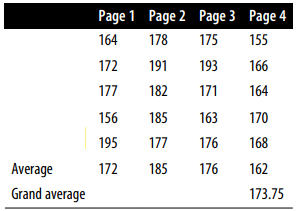
* 4개의 웹페이지에, 각각 5명의 방문자가 잔류했던 시간(second)
* 각 웹페이지에 대한 기록은 서로 완전히 독립적이라고 가정
* 각 웹페이지에 대해 평균 잔류 시간이 유의미하게 차이가 있는지 검정

* 그룹 간 비교는 6가지 경우가 가능함
* 1 vs 2 / 1 vs 3 / 1 vs 4 / 2 vs 3 / 2 vs 4 / 3 vs 5


* 모든 그룹이 서로 차이가 없다라는 귀무가설은, 실행하는 검사 수가 많을수록 귀무가설의 진위와 상관없이 기각될 확률이 낮아짐
* 위 6가지에 대해 각각 검정을 시행하는 대신, '모든 웹페이지는 차이가 없고, 관찰된 웹페이지 간 차이는 우연히 발생할 수 있는 경우'인가를 검정할 수 있는 실험을 할 수 있음 -> ANOVA


1. 모든 데이터를 섞어 하나의 데이터셋으로 만듬
2. 새로운 데이터셋을 추출하여, 기존 그룹의 개수/데이터셋 크기와 동일한 새로운 그룹 형성
3. 새로운 그룹들의 평균 기록
4. 그룹 평균들의 분산 기록
5. 2~4 단계를 R회 가량 반복
6. resampled variance와 observed variance를 이용하여 p-value 계산

### F-Statistic
* 두 그룹의 평균을 비교하는 permutation test 대신 t-test를 사용했던 것처럼,   
ANOVA는 F-statistic에 기반함
* F-statistic: residual error로 인한 분산에 대한 그룹 평균 간 분산의 비율을 기반으로 하며,   
이 비율이 높을수록 통계적으로 유의하다고 판단함

### Two-Way ANOVA
* one-way ANOVA: A/B/D/D test 등, 한가지 요소만 차이나는 경우
* two-way ANOVA: 두가지 요소가 있는 경우   
예시) group A/B,...와 주말/평일


* 'interaction effect'을 식별하여, one-way ANOVA와 유사한 방식으로 처리함   
먼저 grand average의 effect과 treatment effect를 확인한 후, 각 그룹(treatment) 내에서 주말/평일 observation을 분리하여 treatment average와 해당 하위 분류의 average의 차이를 확인